In [474]:
import torch
from torch import nn
from sklearn import model_selection
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from IPython import display

import typing
%matplotlib inline


In [475]:
dataFrame = pd.read_csv('dataframe_.csv')

In [476]:
dataFrame.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [477]:
dataFrame.describe()

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


In [478]:
plt.figure(figsize=(15, 3))


<Figure size 1080x216 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

In [479]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    dataFrame.loc[:, dataFrame.columns != 'output'],
    dataFrame['output'],
    test_size=0.2,
    random_state=42
    )
print(torch.from_numpy(X_train.values).float())
x_train = torch.from_numpy(X_train.values).float()
x_test = torch.from_numpy(X_test.values).float()

y_train = torch.from_numpy(y_train.values).float()
y_train = y_train.reshape(-1, 1)
y_test = torch.from_numpy(y_test.values).float()
y_test = y_test.reshape(-1, 1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

tensor([[-113.2282],
        [ 112.6764],
        [ 117.7598],
        ...,
        [-120.8122],
        [ 105.0756],
        [-133.8182]])
torch.Size([1357, 1])
torch.Size([340, 1])
torch.Size([1357, 1])
torch.Size([340, 1])


In [480]:
## Fixing nan issue in the input
print(torch.isnan(x_train).sum())
mean = x_train[~torch.isnan(x_train)].mean()
x_train[torch.isnan(x_train)] = mean

print(torch.isnan(y_train).sum())
mean = y_train[~torch.isnan(y_train)].mean()
y_train[torch.isnan(y_train)] = mean

print(torch.isnan(x_test).sum())
mean = x_test[~torch.isnan(x_test)].mean()
x_test[torch.isnan(x_test)] = mean

print(torch.isnan(y_test).sum())
mean = y_test[~torch.isnan(y_test)].mean()
y_test[torch.isnan(y_test)] = mean

tensor(1)
tensor(1)
tensor(0)
tensor(0)


In [481]:
def norm_set(x: torch.Tensor, mu: torch.Tensor, sigma: torch.Tensor) -> torch.tensor:
    # Adding a small Offset to the denominator to prevent divide by zero exception
    offset = 1e-6
    x_std_features = (x - mu) / (sigma + offset)
    return x_std_features

x_train_dimensions = list(range(x_train.dim()))
x_train_mean = torch.mean(x_train, dim=x_train_dimensions)
x_train_std = torch.std(x_train, dim=x_train_dimensions)
x_train = norm_set(x_train, x_train_mean, x_train_std)

x_test_dimensions = list(range(x_test.dim()))
x_test_mean = torch.mean(x_test, dim=x_test_dimensions)
x_test_std = torch.std(x_test, dim=x_test_dimensions)
x_test = norm_set(x_test, x_test_mean, x_test_std)
print("Normalised x_train",x_train)
print("Normalised x_test", x_test)

Normalised x_train tensor([[-1.4359],
        [ 1.4143],
        [ 1.4785],
        ...,
        [-1.5316],
        [ 1.3184],
        [-1.6956]])
Normalised x_test tensor([[ 0.3387],
        [-0.6977],
        [-0.4810],
        [ 1.4646],
        [ 1.0020],
        [ 1.3684],
        [-0.1420],
        [ 0.1028],
        [ 1.5752],
        [-0.9255],
        [ 0.1687],
        [ 1.5556],
        [ 1.1720],
        [ 0.3360],
        [-1.2411],
        [-0.1112],
        [-1.7528],
        [-1.0501],
        [ 1.1174],
        [ 1.3549],
        [-0.4000],
        [-1.6147],
        [-0.3525],
        [-1.1913],
        [ 0.9514],
        [ 0.3387],
        [-1.6788],
        [-0.4218],
        [ 1.0925],
        [ 0.8168],
        [-1.4985],
        [ 0.7716],
        [-0.3573],
        [-1.4981],
        [ 0.7333],
        [ 0.7540],
        [ 0.7847],
        [-0.4271],
        [ 1.2497],
        [ 0.6537],
        [ 0.4253],
        [-1.6403],
        [ 0.7112],
        [-1.6275],

In [482]:
class LinearRegression(nn.Module):
  def __init__(self, num_features):
    super().__init__()
    self.weight = nn.Parameter(torch.zeros(1, num_features), requires_grad=False)
    self.linear = nn.Linear(num_features, 1)
  
  def forward(self, x):
    y = 0
    y = torch.matmul(x,self.weight.T) 
    return y

In [483]:
# add a feature for bias
x_train = torch.cat([x_train, torch.ones(x_train.shape[0], 1)], dim=1)
x_test = torch.cat([x_test, torch.ones(x_test.shape[0], 1)], dim=1)
print(x_test)

tensor([[ 0.3387,  1.0000],
        [-0.6977,  1.0000],
        [-0.4810,  1.0000],
        [ 1.4646,  1.0000],
        [ 1.0020,  1.0000],
        [ 1.3684,  1.0000],
        [-0.1420,  1.0000],
        [ 0.1028,  1.0000],
        [ 1.5752,  1.0000],
        [-0.9255,  1.0000],
        [ 0.1687,  1.0000],
        [ 1.5556,  1.0000],
        [ 1.1720,  1.0000],
        [ 0.3360,  1.0000],
        [-1.2411,  1.0000],
        [-0.1112,  1.0000],
        [-1.7528,  1.0000],
        [-1.0501,  1.0000],
        [ 1.1174,  1.0000],
        [ 1.3549,  1.0000],
        [-0.4000,  1.0000],
        [-1.6147,  1.0000],
        [-0.3525,  1.0000],
        [-1.1913,  1.0000],
        [ 0.9514,  1.0000],
        [ 0.3387,  1.0000],
        [-1.6788,  1.0000],
        [-0.4218,  1.0000],
        [ 1.0925,  1.0000],
        [ 0.8168,  1.0000],
        [-1.4985,  1.0000],
        [ 0.7716,  1.0000],
        [-0.3573,  1.0000],
        [-1.4981,  1.0000],
        [ 0.7333,  1.0000],
        [ 0.7540,  1

In [484]:
#test the custom layer
model = LinearRegression(x_train.shape[1])
prediction = model(x_train)
prediction.shape # the output should be Nx1
print(y_train.shape)

torch.Size([1357, 1])


In [485]:
def mean_squared_error(y_pred: torch.Tensor, y_true: torch.Tensor) -> torch.Tensor:
    sq_error = (y_pred - y_true)**2
    N = len(y_pred)
    cost = 1.0/(N) * sq_error.sum()
    return cost

In [486]:
cost = mean_squared_error(y_train, prediction)
print("Mean Squared Error: ",cost)

Mean Squared Error:  tensor(5420.4492)


In [487]:
def gradient_descent_step(model: nn.Module, X: torch.Tensor, y: torch.Tensor, y_pred: torch.Tensor, lr: float) -> None:
    
    weight = model.weight
    N = X.shape[0]
    x_dimensions = list(range(X.dim() - 1))
    meansq_error = mean_squared_error(y, y_pred)
    derivate_error = 2*(y_pred - y)
    derivate_weight = torch.mean(derivate_error * X, dim=x_dimensions)
    weight = weight - lr * derivate_weight
    model.weight = nn.Parameter(weight, requires_grad=False)

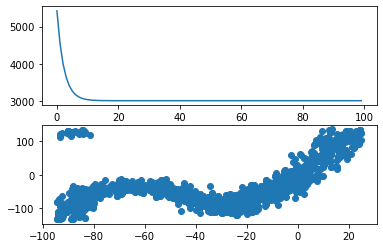

Minimum cost: 3007.056884765625


In [488]:
cost_lst = list()
model = LinearRegression(x_train.shape[1])
alpha = .1
for it in range(100):
    prediction = model(x_train)
    cost = mean_squared_error(y_train, prediction)
    cost_lst.append(cost)
    gradient_descent_step(model, x_train, y_train, prediction, alpha)
fig, axs = plt.subplots(2)
axs[0].plot(list(range(it+1)), cost_lst)
axs[1].scatter(prediction, y_train)
plt.show()
print('Minimum cost: {}'.format(min(cost_lst)))

In [489]:
prediction = model(x_test)
test_error = mean_squared_error(y_test, prediction)
print("Train Error is ", min(cost_lst))
print("Test Error is ",test_error)

Train Error is  tensor(3007.0569)
Test Error is  tensor(3934.5630)


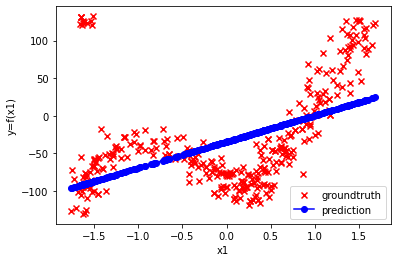

In [490]:
plt.scatter(x_test[:, 0], y_test, c='red', marker='x', label='groundtruth')
outputs = model(x_test)
plt.plot(x_test[:, 0], outputs, c='blue', marker='o', label='prediction')
plt.xlabel('x1')
plt.ylabel('y=f(x1)')
plt.legend()
plt.show()